Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "D:\Anaconda3\lib\site-packages\matplotlib\animation.py", line 953, in _start
    self._init_draw()
  File "D:\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1732, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
StopIteration


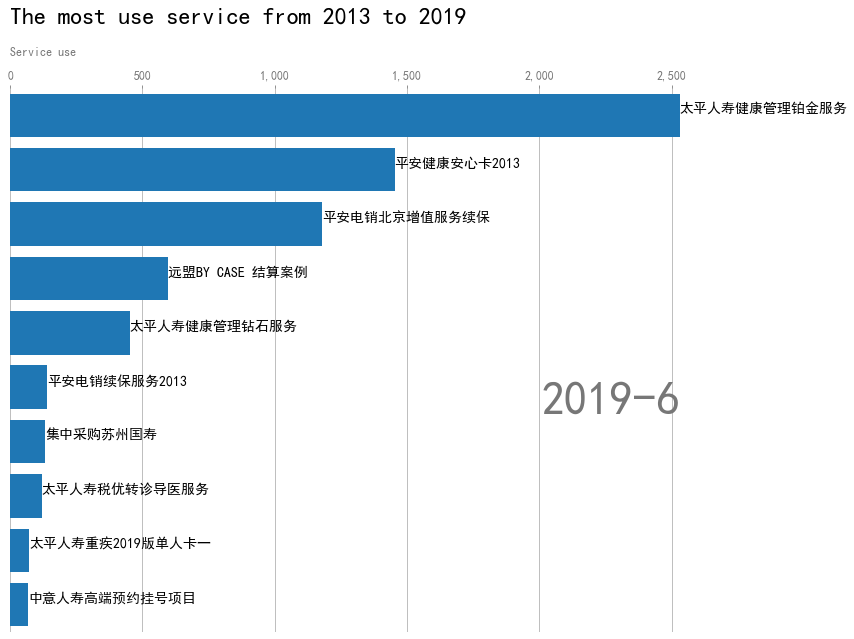

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from pylab import mpl
from IPython.display import HTML

mpl.rcParams['font.sans-serif'] = ['SimHei']  # 防止乱码

df = pd.read_excel(r'D:\数据\2.xlsx')

df['date'] = df['date'].astype('datetime64')
df = df.set_index('date')
df = df.sort_index()  # truncate方法必须先将索引进行排序

# print(df)

df_all = pd.DataFrame()
dates = []
for year in range(2013, 2020):
    for month in range(1, 13):
        date = str(year) + '-' + str(month)
        dates.append(date)
        # truncate按照日期进行切片
        df_temp = df.truncate(after=date)
        count = df_temp['产品'].value_counts().head(10)
        # series转换为 dataframe 先取得索引和值构建字典，再用字典创建df
        dict_count = {'name': count.index, 'value': count.values}
        df_count = pd.DataFrame(dict_count)
        # 添加date字段
        df_count['date'] = date
        df_all = pd.concat([df_all, df_count], axis=0)


fig, ax = plt.subplots(figsize=(12, 10))
def draw_barchart(date):
    dff = df_all[df_all['date'].eq(date)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'])
    dx = dff['value'].max()
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value, i, name, size=14, weight=600, ha='left', va='bottom')
#         ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Service use', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most use service from 2013 to 2019',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)


def date_range():
    for year in range(2013, 2020):
        for month in range(1, 13):
            if year == 2019:
                if month == 7:
                    break
            date = str(year) + '-' + str(month)
            yield date

animator = animation.FuncAnimation(fig, draw_barchart, frames=date_range())
HTML(animator.to_jshtml())